## PROJECT_BIGMART 2013 SALES

### Project description :
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.
 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

##1. problem statement:
Aim of the project to finding the each product sales at each store and preapre a report based on our observations

In [ ]:
# importing all necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
############################################
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
########################
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# loading the input dataset by creating a class

In [ ]:
class Load_Data():
    def data(self,path):
        self.path=path
        ext=self.path.split('.')
        try:
            if ext[1]=='csv':
                return pd.read_csv(self.path)
            elif ext[1]=='xlsx':
                return pd.read_excel(self.path)
            elif ext[1]=='tsv':
                return pd.read_csv(self.path, sep='\t')
        except Exception as e:
            print(f"An error occurred: {e}")

In [ ]:
loader = Load_Data()
path='/content/Train.csv'
df = loader.data(path)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## 2. hypothesis testing:

  1. Lower fat content items(Item_Fat_Content) will have more sales
  2. lower MRP and small sized items  have more sales
  3. tier 1 located places stores have more sales

##3. Exploratory Data Analysis

In [ ]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [ ]:
df.shape

(8523, 12)

#### We can conclude that our dataset is having total 8523 records and 12 features and Item_Outlet_Sales is dependent feature

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Conclusions:
####1.Total we are having 12 features and 7 are object type, 5 are numeric type
####2. Except 2, all other features are filled (with out any null values) and the columns having null values are item_weight and Outlet_size


In [ ]:
x=df.isnull().sum()  # checking for the number of null values in dataset
x

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
null_columns = df.columns[x>0]        # displaying the null containg columns with null values
for col in null_columns:
  ct=df[col].isnull().sum()
  print(f' {col} : {ct}')

 Item_Weight : 1463
 Outlet_Size : 2410


In [ ]:
df.describe()                         # Finding the statstical summery of numerical type columns

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### 1. By observing the above summery, there is huge difference between max and min sales of Item_Outlet_Sales,that means store sales having minimum of 33 sales and also maximum of 13086 and we should note down and analyse this one

In [ ]:
df.describe(include='object')         # Finding the statstical summery of categorical type columns

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


#### 1.By the above summery, we can say that people will like mostly the lower fat items and also taking care about the Fruits and vegetable content in it
2. Medium sized items outlets are more and having more in tier3 locations

## 4. Univariate analysis

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [ ]:
for col in df.columns:
  if df[col].dtypes=='object':
    print(col)

Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [ ]:
df.Item_Identifier.nunique()

1559

## observations:
We can clearly observe that there are 1559 unique items available in stores

In [ ]:
df.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

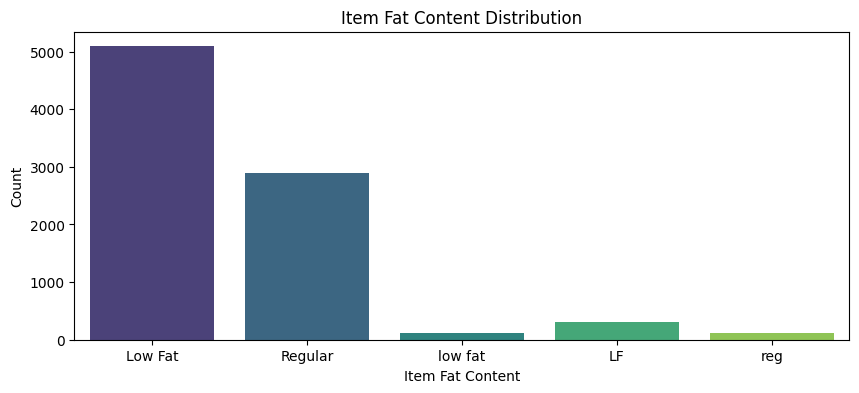

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Item_Fat_Content', data=df, palette='viridis')
plt.title('Item Fat Content Distribution')
plt.xlabel('Item Fat Content')
plt.ylabel('Count')
plt.show()

## Observations:

We can clearly conclude that people prefer buying Low fat content items than Regular content items
and the above categories Low Fat,low fat , LF are same and Regular,reg are same so we need to categorize this

In [ ]:
vc = df['Item_Type'].value_counts()
vc

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

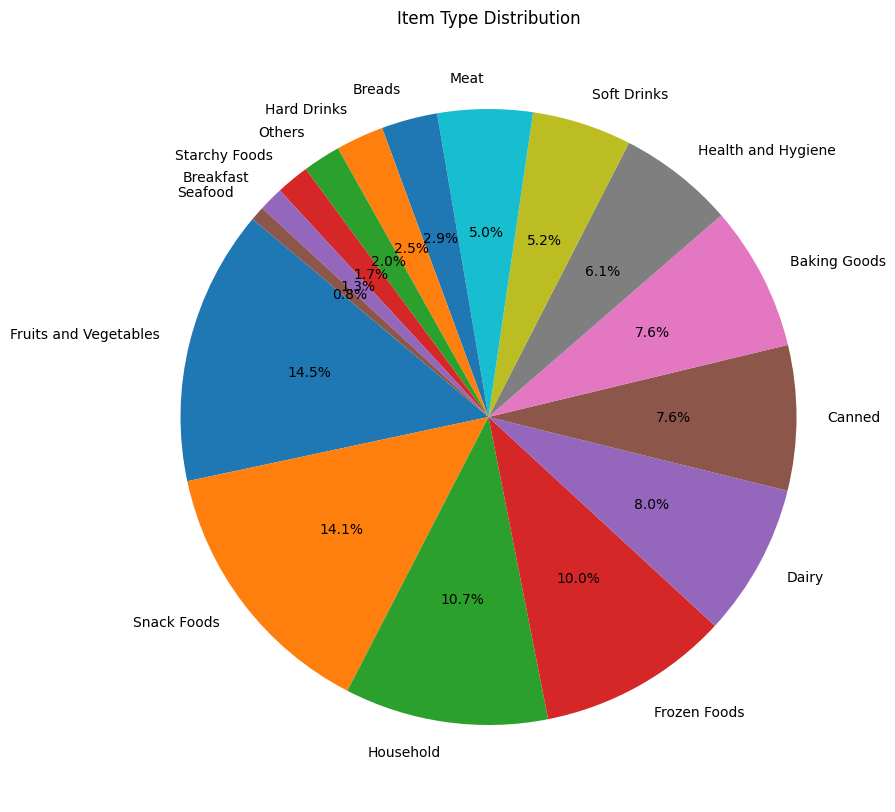

In [ ]:

# Plotting Pie Chart
plt.figure(figsize=(12,10))
plt.pie(vc, labels=vc.index, autopct='%1.1f%%', startangle=140)
plt.title('Item Type Distribution')
plt.show()

## Obesrvations:
1. Fruits and vegetable, snack Foods categories are the categories that  sales
2. starchy,breakfast items and sea food are the lowest selling sales

In [ ]:
df.Outlet_Identifier.nunique()

10

Total there are 10 different stores

In [ ]:
vcs = df['Outlet_Size'].value_counts()
vcs

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

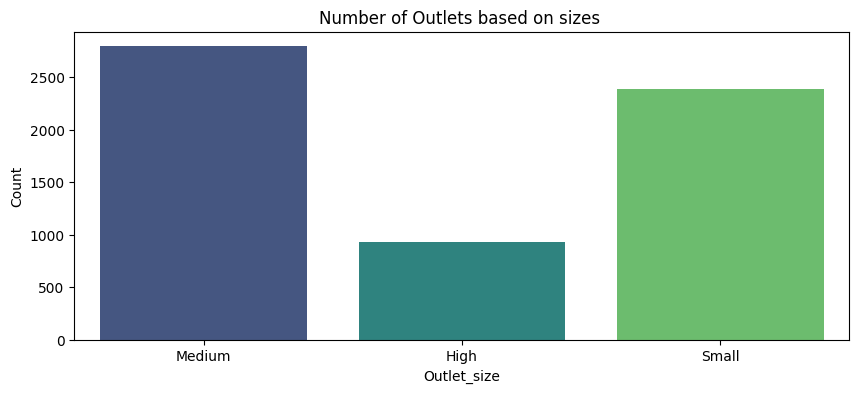

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Outlet_Size', data=df, palette='viridis')
plt.title('Number of Outlets based on sizes ')
plt.xlabel('Outlet_size')
plt.ylabel('Count')
plt.show()

## observations:
Medium sized outlets are more in the country and Big sized are lower in number

In [ ]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [ ]:
vcsc = df['Outlet_Location_Type'].value_counts()
vcsc

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

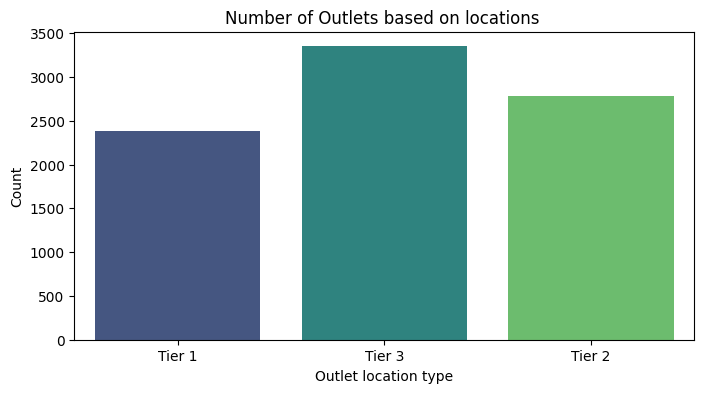

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Outlet_Location_Type', data=df, palette='viridis')
plt.title('Number of Outlets based on locations ')
plt.xlabel('Outlet location type')
plt.ylabel('Count')
plt.show()

There are more number of outlets in Tier3 city locations

In [ ]:
df.Outlet_Type.nunique()

4

In [ ]:
vsc=df.Outlet_Type.value_counts()
vsc

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

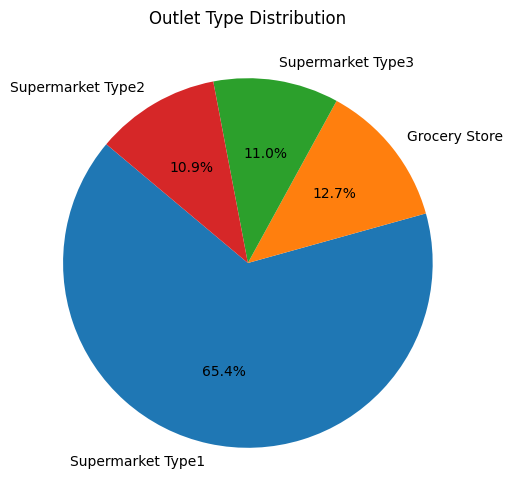

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(vsc, labels=vsc.index, autopct='%1.1f%%', startangle=140)
plt.title('Outlet Type Distribution')
plt.show()

## observations:
there are more number of outlet types are Supermarket type1 and nearly equal proportions of Supermarket type2,type3 and Grocery type stores

In [ ]:
df.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

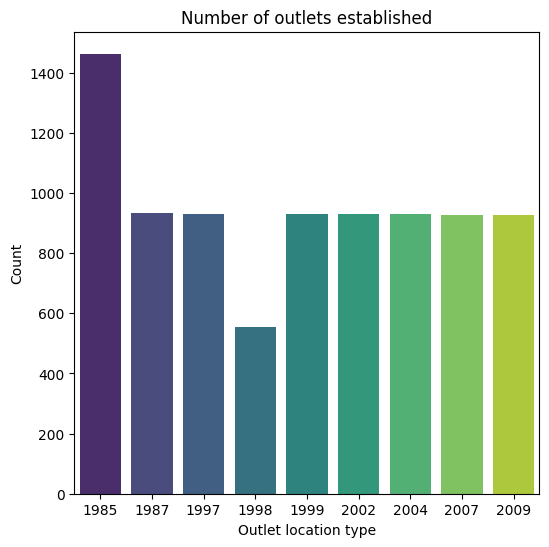

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=df, palette='viridis')
plt.title('Number of outlets established')
plt.xlabel('Outlet location type')
plt.ylabel('Count')
plt.show()

In [ ]:
num_col=[]
for col in df.columns:
  if df[col].dtypes!='object':
    print(col)
    num_col+=[col]

Item_Weight
Item_Visibility
Item_MRP
Outlet_Establishment_Year
Item_Outlet_Sales


<Axes: xlabel='Item_Weight'>

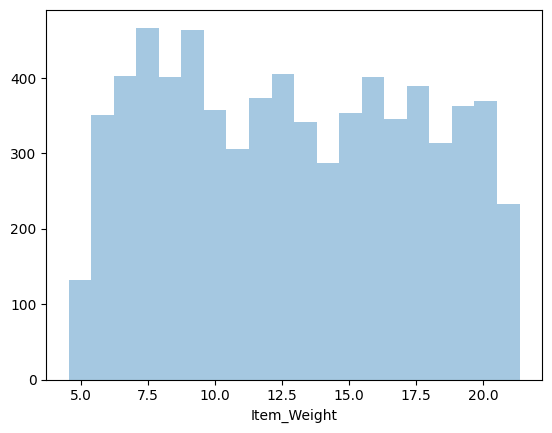

In [ ]:
sns.distplot(df.Item_Weight,kde=False)

In [ ]:
num_col=[]
for col in df.columns:
  if df[col].dtypes!='object':
    print(col)
    num_col+=[col]

Item_Weight
Item_Visibility
Item_MRP
Outlet_Establishment_Year
Item_Outlet_Sales


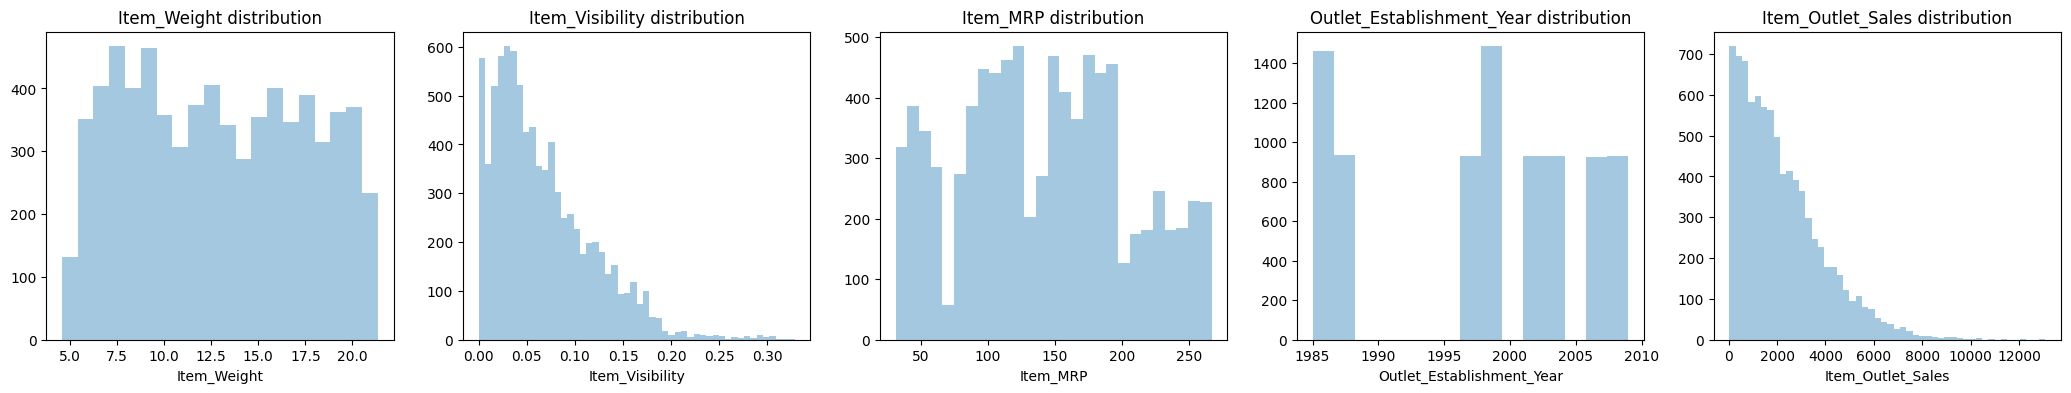

In [ ]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26, 4))

for index, col in enumerate(num_col):
    sns.distplot(df[col], kde=False, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

## observations:
1. Item_Weight is in between 5 kg and 20 kg
2.Both Item_visibility and Item_outlet_sales are right skewed
3. Most of products cost ranges between 100 to 190


## 5.Bi_variate analysis

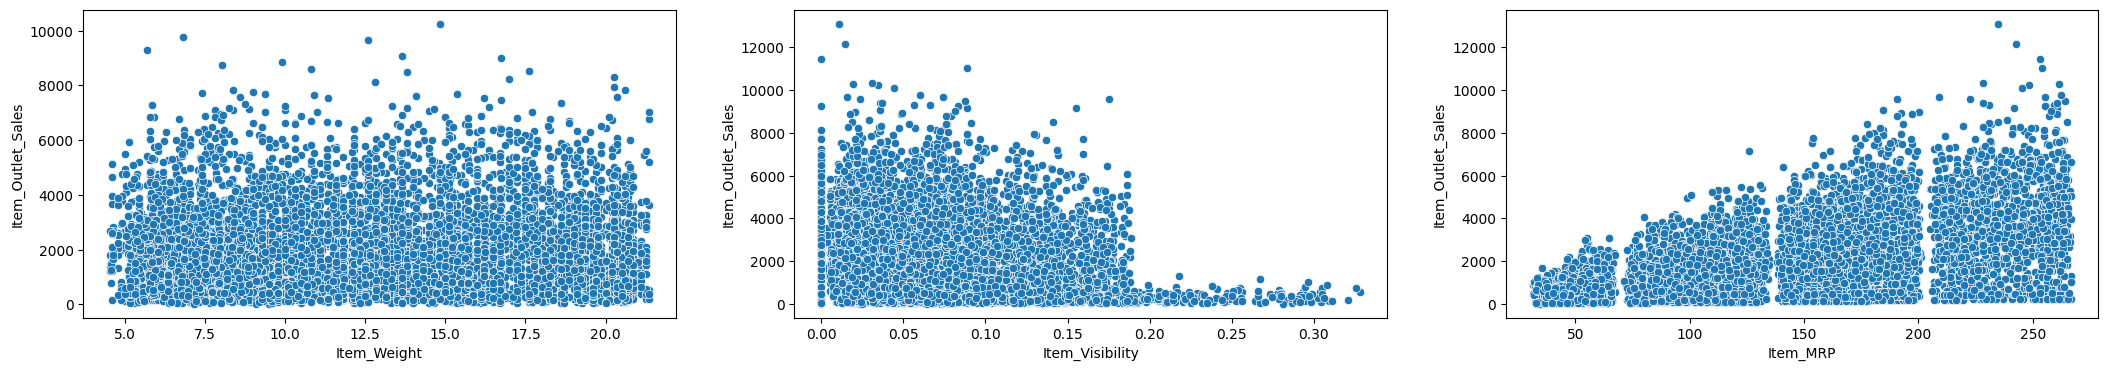

In [ ]:
target = "Item_Outlet_Sales"
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    sns.scatterplot(data=df,x=col, y=target, ax=ax[index])

## Observations:
1. As there is no proper relation of Item_Weight with sales
2. As there is increase in sales with MRP(Price)

In [ ]:
cat_col=[]
for col in df.columns:
  if df[col].dtypes=='object':
    print(col)
    cat_col+=[col]

Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type


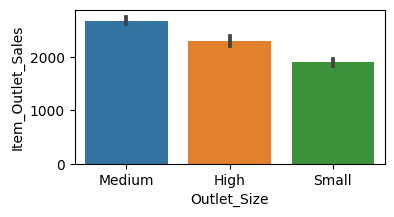

In [ ]:
plt.figure(figsize=(4,2))
sns.barplot(data=df, x='Outlet_Size', y=target)
plt.show()

## Observations:
There is more revenue or sales generated from Medium sized outlets

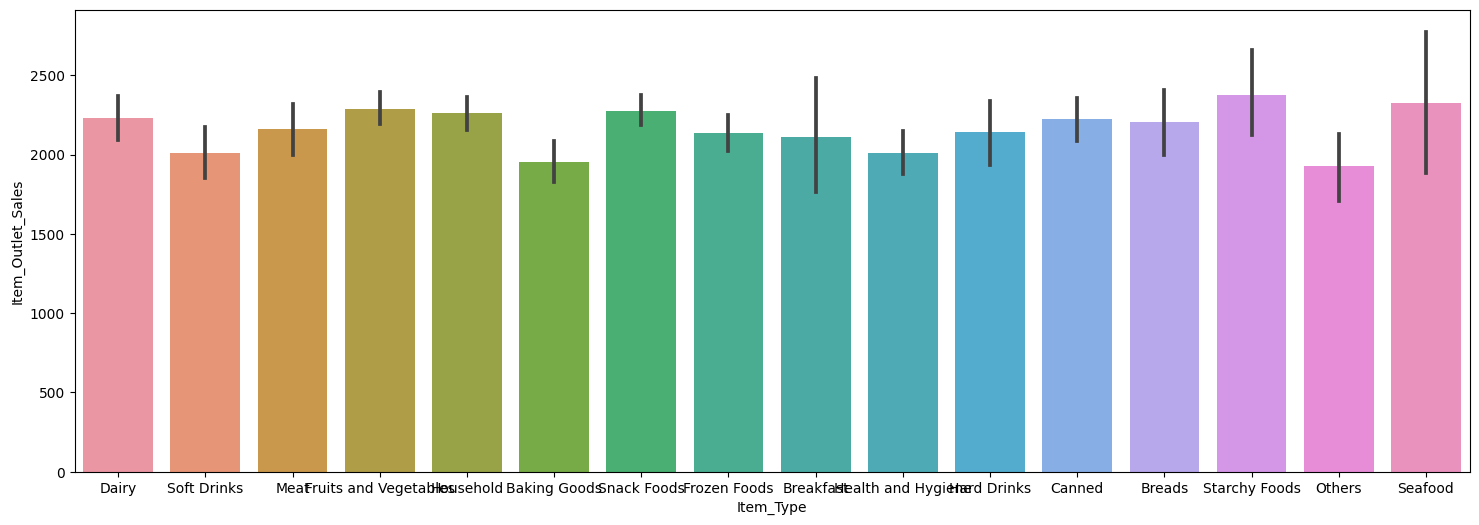

In [ ]:
plt.figure(figsize=(18,6))
sns.barplot(data=df, x='Item_Type', y=target)
plt.show()

## 6.Missing value treatement

In [ ]:
df.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<Axes: xlabel='Item_Weight', ylabel='Density'>

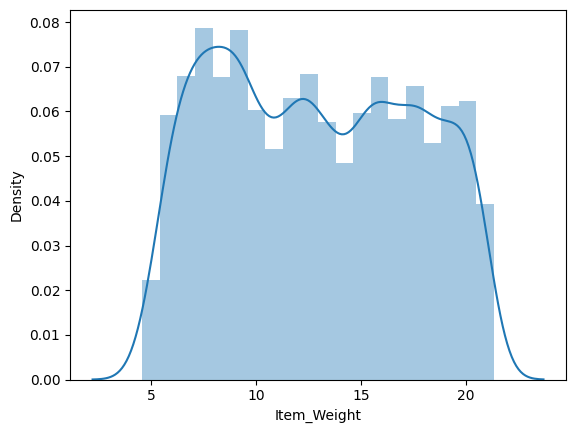

In [ ]:
sns.distplot(df.Item_Weight)

In [ ]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].median())

In [ ]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

## 7.Outliers Treatment

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


<Axes: >

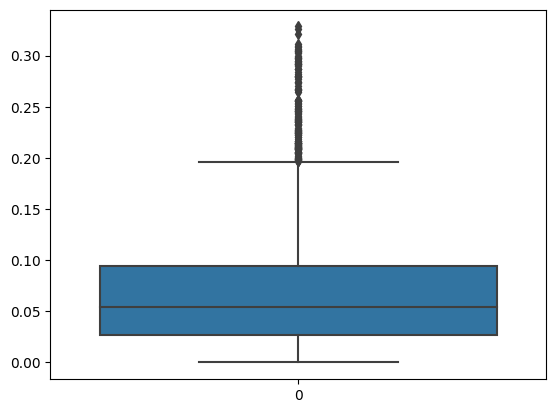

In [ ]:
sns.boxplot(df.Item_Visibility)

We can clearly observe that there are outliers present, so we need to remove or adjust accordingly and here i am using the method called IQR(interquartile)

In [ ]:
Q1  = df['Item_Visibility'].quantile(0.25)
Q3  = df['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
UC=Q3+(IQR*1.5)
LC=Q1-(IQR*1.5)
print(UC,LC)

0.195979015 -0.07440424500000001


The above values are upper and lower limits for that box and outside those values all are outliers so we need to work

In [ ]:
df['Item_Visibility']=np.where(df['Item_Visibility']>UC,UC,df['Item_Visibility'])
df['Item_Visibility']=np.where(df['Item_Visibility']<LC,LC,df['Item_Visibility'])


Adjusted the outliers to upper and lower limits accordingly

<Axes: >

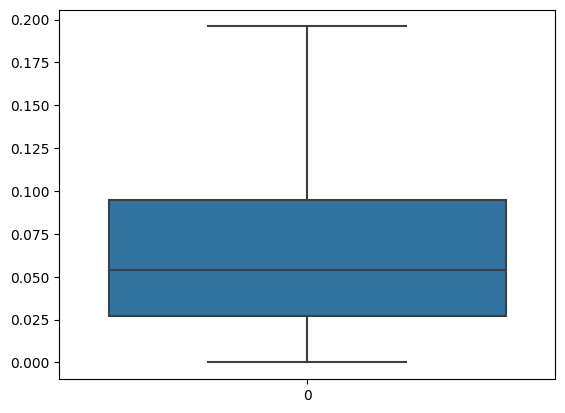

In [ ]:
sns.boxplot(df['Item_Visibility'])

We can see there are no outliers present after the treatment

In [ ]:
# df = df[(df['Item_Visibility'] > lc) & (df['Item_Visibility'] < uc)]  # for removal of outliers if very low

## 8.Feature Engineering

1. In item_fat_content we have same name but with misspelled and we need to name all the similar names into one name

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].map({'Low Fat' :'Low Fat','low fat' :'Low Fat','LF':'Low Fat','Regular' :'Regular','reg':"Regular"})


In [ ]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

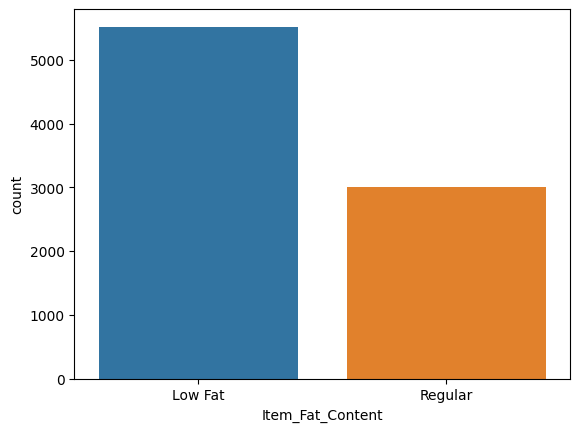

In [ ]:
sns.countplot(x=df.Item_Fat_Content)

We can clearly observe that Low fat items sales are more compared to Regular

2. We have year of establishment and we need to convert that into how many years happened for the establishment

In [ ]:
df['Outlet_Age'] = 2023 - df['Outlet_Establishment_Year']


In [ ]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,14


We clearly observe that Age column added at the end of dataset

In [ ]:
df=df.drop('Outlet_Establishment_Year',axis=1)

In [ ]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,24
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,14


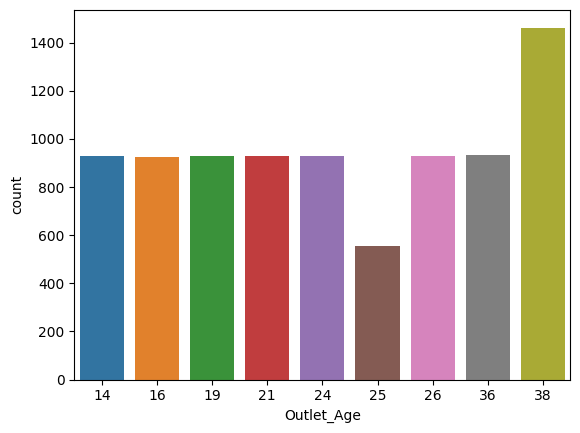

In [ ]:

sns.countplot(x=df['Outlet_Age']);

We observe that there more outlets estalished 38 years back

In [ ]:
df.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

3. Mapping all other different catgories of items into Food, drinks and others only

In [ ]:

category_mapping = {
    'Fruits and Vegetables': 'Foods',
    'Snack Foods': 'Foods',
    'Household': 'Foods',
    'Frozen Foods': 'Foods',
    'Baking Goods': 'Foods',
    'Health and Hygiene': 'Foods',
    'Meat': 'Foods',
    'Breads': 'Foods',
    'Snarchy Foods': 'Foods',
    'Seafood': 'Foods',
    'Breakfast': 'Foods',
    'Soft Drinks': 'Drinks',
    'Hard Drinks': 'Drinks',
    'Dairy': 'Drinks',
    'Canned': 'Drinks',
    'Others':'Others'
}

df['Item_Type_Grouped'] = df['Item_Type'].replace(category_mapping)

df.head(2)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Grouped
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,24,Drinks
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,14,Drinks


In [ ]:
del df['Item_Type']
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Grouped
0,FDA15,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,24,Drinks
1,DRC01,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,14,Drinks


All 16 categories of item type got converted into 3 different catgorie only

4. Converting Item_identifier into its specified one

In [ ]:
df['Item_Identifier_Grouped'] = df['Item_Identifier'].str[0:2]

In [ ]:
df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Grouped_FD,...,Item_Type_Grouped_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,0.016047,249.8092,2,0,1,3735.1380,24,1,...,0,0,0,0,0,0,0,0,0,1
1,5.92,1,0.019278,48.2692,2,2,2,443.4228,14,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
df=df.drop('Item_Identifier',axis=1)

## 9.Catgorical  to numerical conversion

In [ ]:
cat_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [ ]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df1=df.copy()

We can convert all category columns into numerical by LabelEncoder,Onehot encoding methods based on category type

1. Converting the some of the catgory columns using Label encoder method

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
ordinal_features = ['Item_Fat_Content', 'Outlet_Type', 'Outlet_Location_Type']

for feature in ordinal_features:
    df[feature] = encoder.fit_transform(df[feature])


2. Converting others using One hot encoding methos(dummy)

In [ ]:
df = pd.get_dummies(df, columns=[ 'Item_Identifier_Grouped','Item_Type_Grouped', 'Outlet_Identifier'], drop_first=True)

3. Converting outlet_size using map method

In [ ]:
df['Outlet_Size'] = df['Outlet_Size'].map({'Small'  : 1,'Medium' : 2,'High'   : 3}).astype(int)

In [ ]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age,Item_Identifier_Grouped_FD,...,Item_Type_Grouped_Starchy Foods,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,9.30,0,0.016047,249.8092,2,0,1,3735.1380,24,1,...,0,0,0,0,0,0,0,0,0,1
1,5.92,1,0.019278,48.2692,2,2,2,443.4228,14,0,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0,0.016760,141.6180,2,0,1,2097.2700,24,1,...,0,0,0,0,0,0,0,0,0,1
3,19.20,1,0.000000,182.0950,2,2,0,732.3800,25,1,...,0,0,0,0,0,0,0,0,0,0
4,8.93,0,0.000000,53.8614,3,2,1,994.7052,36,0,...,0,1,0,0,0,0,0,0,0,0


This is the final data set after feature engineering and now this dataset is ready for model training and

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int64  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_MRP                         8523 non-null   float64
 4   Outlet_Size                      8523 non-null   int64  
 5   Outlet_Location_Type             8523 non-null   int64  
 6   Outlet_Type                      8523 non-null   int64  
 7   Item_Outlet_Sales                8523 non-null   float64
 8   Outlet_Age                       8523 non-null   int64  
 9   Item_Identifier_Grouped_FD       8523 non-null   uint8  
 10  Item_Identifier_Grouped_NC       8523 non-null   uint8  
 11  Item_Type_Grouped_Foods          8523 non-null   uint8  
 12  Item_Type_Grouped_Ot

## 10.Feature scaling

The dataset is not normally distributed so we need standardise this dataset

In [ ]:
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
Y=scaler.tranform(Y)


## 11.model training, testing and evaluation

Splitting the data into train and testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

Train and test our dataset with some of the regression model

1. Linear Regression model

In [ ]:
model1= LinearRegression()
model1.fit(X_train, y_train)
pred1 = model1.predict(X_test)
score1=model1.score(X_train,y_train)
print(f'Training score  : {score1}')
mse1  = mean_squared_error(y_test , pred1)
print(f'MSE :{mse1}')
rmse1 = np.sqrt(mse1)
print(f'RMSE :{rmse1}')
r2score1 = r2_score(y_test, pred1)
print(f'r2_score :{r2score1}')

Training score  : 0.5633413662413267
MSE :1277155.1244376488
RMSE :1130.1128812811792
r2_score :0.5636431659891613


In [ ]:
# Evaluate on the training set
train_predictions1 = model1.predict(X_train)
train_mse1 = mean_squared_error(y_train, train_predictions1)

# Evaluate on the testing set
test_predictions1 = model1.predict(X_test)
test_mse1 = mean_squared_error(y_test, test_predictions1)

print(f"Training MSE: {train_mse1}")
print(f"Testing MSE: {test_mse1}")


Training MSE: 1269806.4593307397
Testing MSE: 1277155.1244376488


Regularization Lasso regression:

In [ ]:
model2= Lasso(alpha=0.01)
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
score2=model2.score(X_train,y_train)
print(f'Training score  : {score2}')
mse2  = mean_squared_error(y_test , pred2)
print(f'MSE :{mse2}')
rmse2 = np.sqrt(mse2)
print(f'RMSE :{rmse2}')
r2score2 = r2_score(y_test, pred2)
print(f'r2_score :{r2score2}')

Training score  : 0.5633415417803597
MSE :1277117.9849650979
RMSE :1130.0964494082343
r2_score :0.5636558551780853


In [ ]:
# Evaluate on the training set
train_predictions2 = model2.predict(X_train)
train_mse2 = mean_squared_error(y_train, train_predictions2)

# Evaluate on the testing set
test_predictions2 = model2.predict(X_test)
test_mse2 = mean_squared_error(y_test, test_predictions2)

print(f"Training MSE: {train_mse2}")
print(f"Testing MSE: {test_mse2}")

Training MSE: 1269805.9488619647
Testing MSE: 1277117.9849650979


Ridge

In [ ]:
model3= Ridge(alpha=1.0)
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)
score3=model3.score(X_train,y_train)
print(f'Training score  : {score3}')
mse3  = mean_squared_error(y_test , pred3)
print(f'MSE :{mse3}')
rmse3 = np.sqrt(mse3)
print(f'RMSE :{rmse3}')
r2score3 = r2_score(y_test, pred3)
print(f'r2_score :{r2score3}')

Training score  : 0.5633415160943571
MSE :1277133.607313187
RMSE :1130.10336134054
r2_score :0.5636505175975348


4. Random forest regression

In [ ]:
model4= RandomForestRegressor()
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)
score4=model4.score(X_train,y_train)
print(f'Training score  : {score4}')
mse4= mean_squared_error(y_test , pred4)
print(f'MSE :{mse4}')
rmse4 = np.sqrt(mse4)
print(f'RMSE :{rmse4}')
r2score4 = r2_score(y_test, pred4)
print(f'r2_score :{r2score4}')

Training score  : 0.9387925271023972
MSE :1300379.555663238
RMSE :1140.3418591208683
r2_score :0.5557082338204768


XGBOOST

In [ ]:
model5= XGBRegressor()
model5.fit(X_train, y_train)
pred5 = model4.predict(X_test)
score5=model5.score(X_train,y_train)
print(f'Training score  : {score5}')
mse5= mean_squared_error(y_test , pred5)
print(f'MSE :{mse5}')
rmse5 = np.sqrt(mse5)
print(f'RMSE :{rmse5}')
r2score5 = r2_score(y_test, pred5)
print(f'r2_score :{r2score5}')

Training score  : 0.8611361162388084
MSE :1300379.555663238
RMSE :1140.3418591208683
r2_score :0.5557082338204768


We can also increase the performance using Hyper parameter tuning

## Conclusions:

1.Lower MSE values and higher R-squared values indicate better performance, Therefore we can see that there is good performance With both linear and Lasso Regression model so we finlised our model with Lasso one
2.Both testing as well as training mean squared errors almost similar there is no chance for overfitting also

## 12.Saving the model

In [ ]:
from sklearn.externals import joblib

joblib.dump(model2, 'BIGMART WITH LASSO.pkl')